In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")  ## what is this, a file, an API? how is 
## this related to the 2 csv files?
conn = engine.connect()


In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Exploratory Climate Analysis

In [11]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [12]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs, Station.station, Station.name).\
filter(Measurement.station == Station.station).\
filter(Measurement.date.between('2016-01-01', '2016-12-31')).\
order_by(Measurement.date).all()
results

[('2016-01-01', 0.0, 62.0, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 ('2016-01-01', 0.02, 63.0, 'USC00513117', 'KANEOHE 838.1, HI US'),
 ('2016-01-01',
  0.0,
  73.0,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('2016-01-01',
  0.0,
  64.0,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('2016-01-01', 0.02, 74.0, 'USC00519281', 'WAIHEE 837.5, HI US'),
 ('2016-01-01', 0.0, 73.0, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US'),
 ('2016-01-02', 0.0, 71.0, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 ('2016-01-02', 0.01, 73.0, 'USC00513117', 'KANEOHE 838.1, HI US'),
 ('2016-01-02',
  0.05,
  73.0,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('2016-01-02',
  0.13,
  73.0,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('2016-01-02', 0.03, 72.0, 'USC00519281', 'WAIHEE 837.5, HI US'),
 ('2016-01-02', 0.13, 69.0, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US'),
 ('2016-01-03', 0.0, 63.0, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 ('2016-01-0

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date colu
df = pd.DataFrame(results, columns=['date', 'prcp', 'tobs', 'station', 'name'])
df.set_index(['date'], inplace=True)
df 

prcp  tobs      station                                    name
date                                                                       
2016-01-01  0.00  62.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-01  0.02  63.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-01  0.00  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-01  0.00  64.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-01  0.02  74.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-01  0.00  73.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-02  0.00  71.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-02  0.01  73.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-02  0.05  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-02  0.13  73.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-02  0.03  72.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-02  0.13  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-03  0.00  63.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-03  0.00  71.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-03  0.00  75.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-03  0.00  69.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-03  0.00  68.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-03  0.00  65.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-04  0.00  62.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-04  0.00  72.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-04  0.00  76.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-04   NaN  76.0  USC00517948                       PEARL CITY, HI US
2016-01-04  0.00  69.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-04  0.00  62.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-05  0.00  68.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-05  0.19  68.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-05  0.10  74.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-05   NaN  75.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-05  0.18  70.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-05  0.00  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
...          ...   ...          ...                                     ...
2016-12-27  0.02  74.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-27  0.00  75.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-27  0.05  71.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-27  0.14  71.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-28  0.02  71.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-28  0.09  71.0  USC00513117                    KANEOHE 838.1, HI US
2016-12-28  0.01  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-28   NaN  71.0  USC00517948                       PEARL CITY, HI US
2016-12-28  0.06  72.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-28  0.09  72.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-28  0.14  71.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-29  0.04  73.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-29  0.18  72.0  USC00513117                    KANEOHE 838.1, HI US
2016-12-29  0.56  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-29   NaN  71.0  USC00517948                       PEARL CITY, HI US
2016-12-29  0.05  77.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-29  0.52  74.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-29  1.03  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-30  0.12  69.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-30  0.21  69.0  USC00513117                    KANEO

In [14]:
# Sort the dataframe by date
df.sort_values("date")
df

prcp  tobs      station                                    name
date                                                                       
2016-01-01  0.00  62.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-01  0.02  63.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-01  0.00  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-01  0.00  64.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-01  0.02  74.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-01  0.00  73.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-02  0.00  71.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-02  0.01  73.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-02  0.05  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-02  0.13  73.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-02  0.03  72.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-02  0.13  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-03  0.00  63.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-03  0.00  71.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-03  0.00  75.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-03  0.00  69.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-03  0.00  68.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-03  0.00  65.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-04  0.00  62.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-04  0.00  72.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-04  0.00  76.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-04   NaN  76.0  USC00517948                       PEARL CITY, HI US
2016-01-04  0.00  69.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-04  0.00  62.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-05  0.00  68.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-05  0.19  68.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-05  0.10  74.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-05   NaN  75.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-05  0.18  70.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-05  0.00  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
...          ...   ...          ...                                     ...
2016-12-27  0.02  74.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-27  0.00  75.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-27  0.05  71.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-27  0.14  71.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-28  0.02  71.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-28  0.09  71.0  USC00513117                    KANEOHE 838.1, HI US
2016-12-28  0.01  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-28   NaN  71.0  USC00517948                       PEARL CITY, HI US
2016-12-28  0.06  72.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-28  0.09  72.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-28  0.14  71.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-29  0.04  73.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-29  0.18  72.0  USC00513117                    KANEOHE 838.1, HI US
2016-12-29  0.56  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-29   NaN  71.0  USC00517948                       PEARL CITY, HI US
2016-12-29  0.05  77.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-29  0.52  74.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-29  1.03  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-30  0.12  69.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-30  0.21  69.0  USC00513117                    KANEO

In [15]:
df.dropna()

prcp  tobs      station                                    name
date                                                                       
2016-01-01  0.00  62.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-01  0.02  63.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-01  0.00  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-01  0.00  64.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-01  0.02  74.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-01  0.00  73.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-02  0.00  71.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-02  0.01  73.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-02  0.05  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-02  0.13  73.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-02  0.03  72.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-02  0.13  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-03  0.00  63.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-03  0.00  71.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-03  0.00  75.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-03  0.00  69.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-01-03  0.00  68.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-03  0.00  65.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-04  0.00  62.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-04  0.00  72.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-04  0.00  76.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-04  0.00  69.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-04  0.00  62.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-05  0.00  68.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-05  0.19  68.0  USC00513117                    KANEOHE 838.1, HI US
2016-01-05  0.10  74.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-01-05  0.18  70.0  USC00519281                     WAIHEE 837.5, HI US
2016-01-05  0.00  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-01-06  0.00  73.0  USC00519397                    WAIKIKI 717.2, HI US
2016-01-06  0.30  70.0  USC00513117                    KANEOHE 838.1, HI US
...          ...   ...          ...                                     ...
2016-12-26  1.48  71.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-27  0.00  74.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-27  0.03  73.0  USC00513117                    KANEOHE 838.1, HI US
2016-12-27  0.02  74.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-27  0.00  75.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-27  0.05  71.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-27  0.14  71.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-28  0.02  71.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-28  0.09  71.0  USC00513117                    KANEOHE 838.1, HI US
2016-12-28  0.01  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-28  0.06  72.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-28  0.09  72.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-28  0.14  71.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-29  0.04  73.0  USC00519397                    WAIKIKI 717.2, HI US
2016-12-29  0.18  72.0  USC00513117                    KANEOHE 838.1, HI US
2016-12-29  0.56  73.0  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US
2016-12-29  0.05  77.0  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US
2016-12-29  0.52  74.0  USC00519281                     WAIHEE 837.5, HI US
2016-12-29  1.03  69.0  USC00516128            MANOA LYON ARBO 785.2, HI US
2016-12-30  0.12  69.0  USC00519397                    WAIKI

<IPython.core.display.Javascript object>


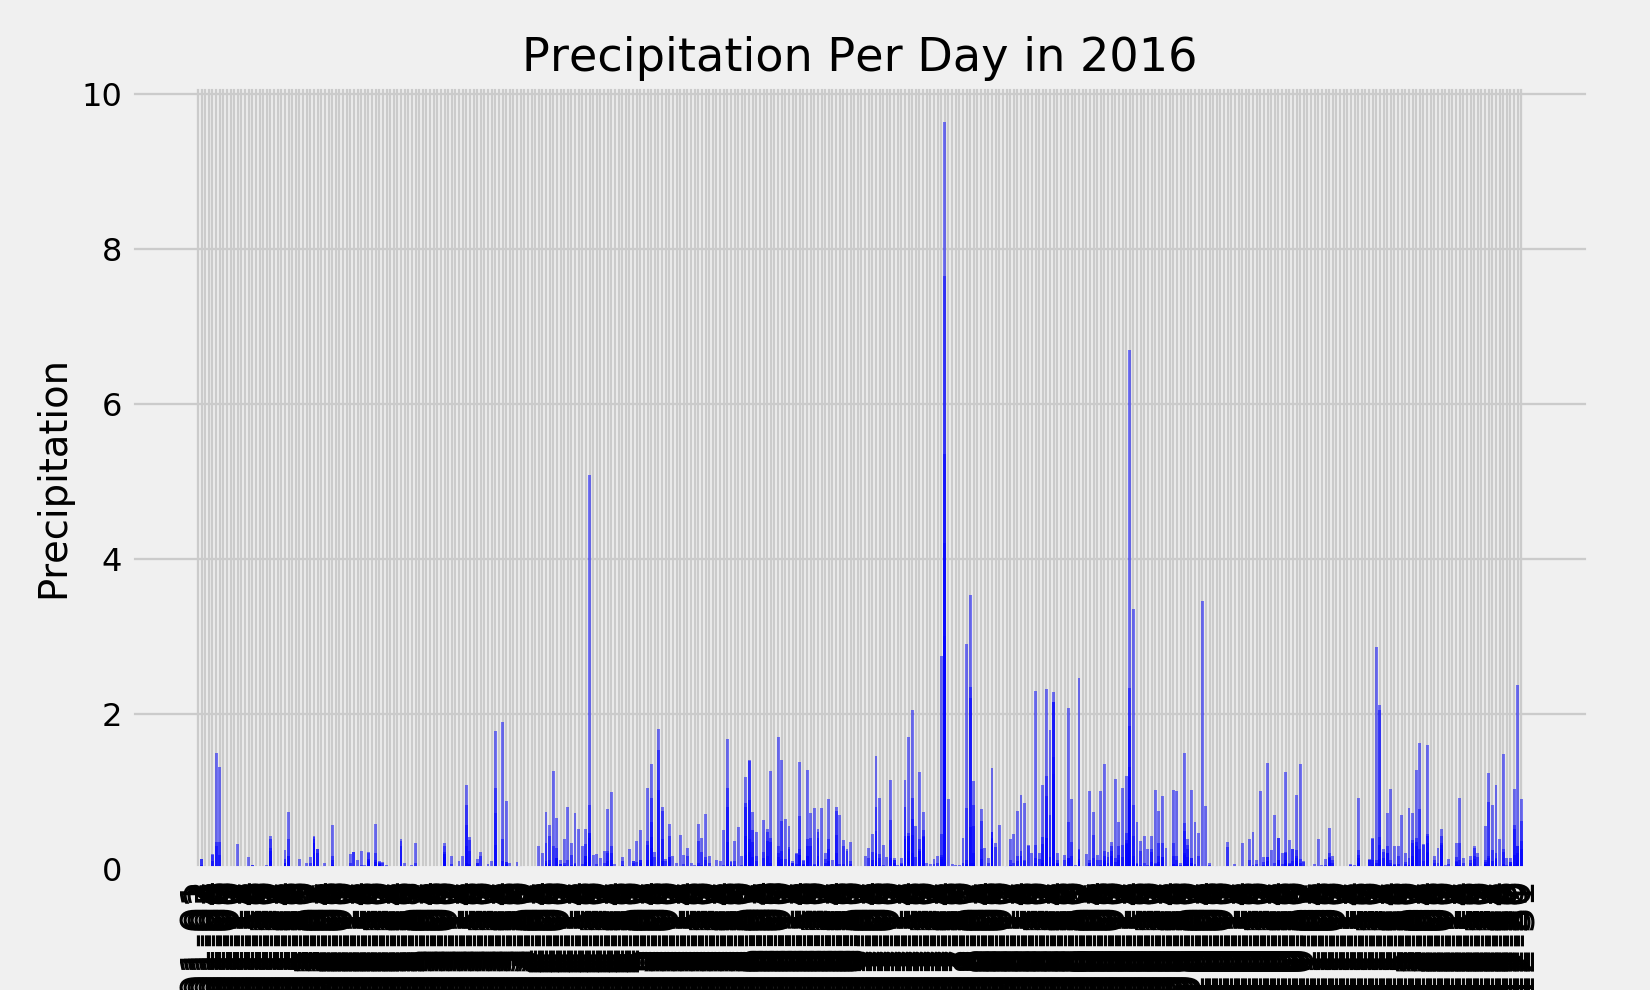

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,6))
plt.bar(df.index, df.prcp, color='b', alpha=0.5, align="center")

plt.title("Precipitation Per Day in 2016")
plt.xlabel("Dates")
plt.ylabel("Precipitation")

plt.tight_layout()

plt.show

# Rotate the xticks for the dates
plt.xticks(fontsize=18, rotation=90)

plt.savefig("Precipitation Per Day in 2016.png")

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from today
last_year = dt.date.today() - dt.timedelta(days=365)
print(last_year)


2017-10-09


In [18]:
# Use Pandas todf calcualte the summary statistics for the precipitation data
df.describe() 

prcp         tobs
count  2069.000000  2309.000000
mean      0.179845    74.144218
std       0.506363     4.469373
min       0.000000    56.000000
25%       0.000000    71.000000
50%       0.020000    75.000000
75%       0.150000    78.000000
max       9.640000    84.000000

In [19]:
# How many stations are available in this dataset?
session.query(func.count(Station.name)).all()

[(9)]

In [20]:
# List the stations and the counts in descending order.
station_activity=session.query(Measurement.station, func.count(Measurement.station)).\
   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
#  What are the most active stations?
station_activity[0]

('USC00519281', 2772)

In [38]:
df = df['tobs'].loc[station:USC00519281]
df

NameError: name 'station' is not defined

In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs, Station.station, Station.name).\
filter(Measurement.station == Station.station).\
filter(Measurement.date.between('2017-10-09', '2018-10-09')).\
order_by(Measurement.date).all()
results

[]

In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# USC00519281  
mintemp = session.query(Measurement.station, func.min(Measurement.tobs)).\
filter(Measurement.station == "USC005191281")
mintemp
# station_activity=session.query(Measurement.station, func.count(Measurement.station)).\
#    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [24]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [27]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [31]:
# Plot the daily normals as an area plot with `stacked=False`
